# **Email Spam Detection:**

##**Introduction:**
In today's digital age, email communication has become an integral part of our lives. However, along with legitimate messages, the influx of spam emails has also grown significantly, causing inconvenience and security concerns for users. The need to accurately distinguish between spam and non-spam (ham) emails has led to the development of sophisticated email spam detection systems. These systems employ machine learning techniques to automatically classify incoming emails as spam or ham based on their content.


###**Objective:**
The primary objective of this email spam detection project is to build a robust and efficient machine learning model that can accurately classify emails as either spam or ham. By leveraging the power of natural language processing and feature extraction, this project aims to create a system that can effectively differentiate between legitimate and unwanted email messages. The project will involve preprocessing and vectorizing the text data, exploring and analyzing the dataset, selecting appropriate machine learning algorithms, and evaluating the model's performance through various metrics. Ultimately, the goal is to provide users with a reliable email spam detection solution that enhances their email experience by minimizing the impact of spam messages.

In [ ]:
# Importing Liabraries:

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Reading CSV file

Email_spam = pd.read_csv("spam.csv", encoding = "latin-1")

### Performing Data Analysis:

In [ ]:
# Showing First 5 rows

Email_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Showing last 5 rows.

Email_spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
# Rows and Column in dataset.

Email_spam.shape

(5572, 5)

- As we can see from above code, there are 5572 rows and 2 columns in this dataset.

### Performing Data Cleaning

In [ ]:
# Removing extra columns.

Email_spam = Email_spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [ ]:
# Checking for total null values.

Email_spam.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
# Rename column names.

Email_spam = Email_spam.rename(columns={"v1":'Category_label', "v2":'Text_mail'})

In [ ]:
# Identifying total number of ham and spam messages.

Email_spam['Category_label'].value_counts()

ham     4825
spam     747
Name: Category_label, dtype: int64

In [ ]:
# It will describe the columns.

Email_spam.describe()

,Category_label,Text_mail
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# counting the length of each text mail and creating new column for better understanding.

Email_spam['Text_length'] = Email_spam['Text_mail'].apply(len)
Email_spam.head()

,Category_label,Text_mail,Text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization:

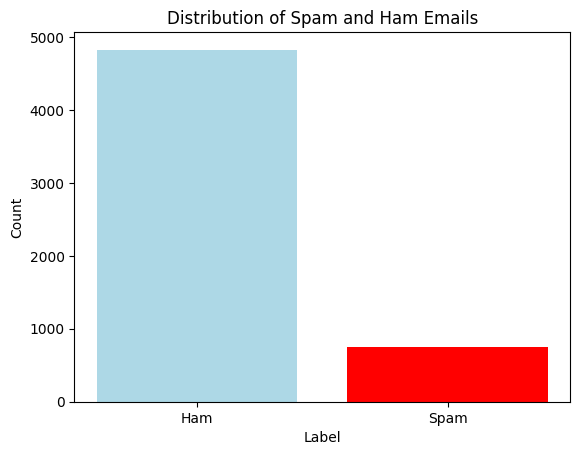

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = Email_spam['Category_label'].value_counts()

# Create a bar plot
plt.bar(label_counts.index, label_counts.values, color=['lightblue', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

- In the bar plot visualization, we can see that there are more "ham" messages (legitimate emails) than "spam" messages. This reflects the real-world scenario where most of the emails we receive are genuine and not spam. The taller bar for "ham" messages indicates that they are the majority in the dataset. This is important to know because when we build a model to detect spam, we need to consider this difference in numbers. We'll need to make sure our model doesn't favor the majority class too much and can accurately catch both spam and legitimate messages.

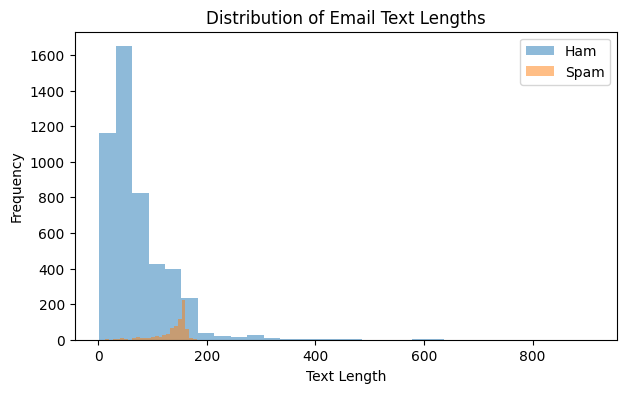

In [ ]:
# Create a histogram of text lengths
plt.figure(figsize=(7,4))
plt.hist(Email_spam[Email_spam['Category_label'] == 'ham']['Text_length'], bins=30, alpha=0.5, label='Ham')
plt.hist(Email_spam[Email_spam['Category_label'] == 'spam']['Text_length'], bins=30, alpha=0.5, label='Spam')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Email Text Lengths')
plt.legend()

plt.show()

### Using Mapping technique to encode the category column.

In [ ]:
# mapping target variable Spam to 0 and ham to 1:

Email_spam.loc[:,'Category_label'] = Email_spam.Category_label.map({"ham":0, "spam":1})

<ipython-input-125-d53970518ecb>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Email_spam.loc[:,'Category_label'] = Email_spam.Category_label.map({"ham":0, "spam":1})


In [ ]:
# Checking for mapped category label.

Email_spam.head(10)

,Category_label,Text_mail,Text_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


- Here we can see that some text messages are in capital letters, so let's convert these letters into lower case.

In [ ]:
Email_spam['Text_mail'] = Email_spam['Text_mail'].astype(str).str.lower()

In [ ]:
Email_spam.head(3)

,Category_label,Text_mail,Text_length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155


### Spliting the dataset:

In [ ]:
# spliting the feature and label

X = Email_spam['Text_mail']
y = Email_spam['Category_label']

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

- **Performing Feature Extraction:**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

## **Model Building**
### **Support Vector Machine:**

In [ ]:
from sklearn.svm import SVC

# Model building

svm = SVC(kernel = 'linear')

svm.fit(X_train_tfid, y_train)

SVC(kernel='linear')

In [ ]:
# Making Prediction on Train dataset:

from sklearn.metrics import accuracy_score, classification_report

y_pred_train = svm.predict(X_train_tfid)

accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train, target_names=["spam","ham"])

print("Support Vector Classifier Accuracy Score on Train Dataset : {:.2f}%".format(accuracy_train*100))
print("Classification Report on Train Dataset : ",report_train)

Support Vector Classifier Accuracy Score on Train Dataset : 99.62%
Classification Report on Train Dataset :                precision    recall  f1-score   support

        spam       1.00      1.00      1.00      3849
         ham       0.99      0.98      0.99       608

    accuracy                           1.00      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       1.00      1.00      1.00      4457



In [ ]:
# Fiting the svm model on Test dataset
# svm.fit(X_test_tfid, y_test)

# Making prediction on Test dataset.

y_pred_test = svm.predict(X_test_tfid)

accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test, target_names=["spam","ham"])

print("Support Vector Classifier Accuracy Report on Test Dataset : {:.2f}%".format(accuracy_test*100))
print("Classification Report on Test Dataset : ", report_test)

Support Vector Classifier Accuracy Report on Test Dataset : 99.19%
Classification Report on Test Dataset :                precision    recall  f1-score   support

        spam       0.99      1.00      1.00       976
         ham       0.99      0.95      0.97       139

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



- Now we will check whether the build model is predicting the spam/ham for new email message or not.

In [ ]:
new_email = '''free entry in 2 wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to recieve entry question(std txt rate)t&c's
                apply 08452810075over18's free free entry'''

# Preprocess the new message using the same vectorizer
new_email_tfidf = vectorizer.transform([new_email])

# Predict using the trained classifier
prediction = svm.predict(new_email_tfidf)

if prediction[0] == 1:
    print("Predicted: Spam")
else:
    print("Predicted: Not Spam")

Predicted: Spam


### **Naive Bayes:**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

GNB_model = MultinomialNB()

GNB_model.fit(X_train_tfid, y_train)

MultinomialNB()

In [ ]:
# Making Prediction on Train dataset:

from sklearn.metrics import accuracy_score, classification_report

y_pred_train = GNB_model.predict(X_train_tfid)

accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train, target_names=["spam","ham"])

print("Naiv Bayes Accuracy Score on Train Dataset : {:.2f}%".format(accuracy_train*100))
print("Classification Report on Train Dataset : ",report_train)

Naiv Bayes Accuracy Score on Train Dataset : 98.14%
Classification Report on Train Dataset :                precision    recall  f1-score   support

        spam       0.98      1.00      0.99      3849
         ham       1.00      0.86      0.93       608

    accuracy                           0.98      4457
   macro avg       0.99      0.93      0.96      4457
weighted avg       0.98      0.98      0.98      4457



In [ ]:
# Making prediction on Test dataset.

y_pred_test = GNB_model.predict(X_test_tfid)

accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test, target_names=["spam","ham"])

print("Naive Bayes Accuracy Report on Test Dataset : {:.2f}%".format(accuracy_test*100))
print("Classification Report on Test Dataset : ", report_test)

Naive Bayes Accuracy Report on Test Dataset : 98.03%
Classification Report on Test Dataset :                precision    recall  f1-score   support

        spam       0.98      1.00      0.99       976
         ham       1.00      0.84      0.91       139

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
new_sent = ''' free entry in 2 wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to recieve entry question(std txt rate)t&c's
                apply 08452810075over18's free free entry '''

new_email_tfidf = vectorizer.transform([new_sent])
prediction = GNB_model.predict(new_email_tfidf)

if prediction[0] == 1:
    print("Predicted: Spam")
else:
    print("Predicted: Not Spam")

Predicted: Spam


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train_tfid, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Making Prediction on Train dataset:

from sklearn.metrics import accuracy_score, classification_report

y_pred_train = gb_classifier.predict(X_train_tfid)

accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train, target_names=["spam","ham"])

print("Gradient Boosting Classifier Accuracy Score on Train Dataset : {:.2f}%".format(accuracy_train*100))
print("Classification Report on Train Dataset : ",report_train)

Gradient Boosting Classifier Accuracy Score on Train Dataset : 97.26%
Classification Report on Train Dataset :                precision    recall  f1-score   support

        spam       0.97      1.00      0.98      3849
         ham       1.00      0.80      0.89       608

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



In [ ]:
# Making prediction on Test dataset.

y_pred_test = gb_classifier.predict(X_test_tfid)

accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test, target_names=["spam","ham"])

print("Gradient Boosting Classifier Accuracy Report on Test Dataset : {:.2f}%".format(accuracy_test*100))
print("Classification Report on Test Dataset : ", report_test)

Gradient Boosting Classifier Accuracy Report on Test Dataset : 97.67%
Classification Report on Test Dataset :                precision    recall  f1-score   support

        spam       0.97      1.00      0.99       976
         ham       1.00      0.81      0.90       139

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
new_sent = ''' free entry in 2 wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to recieve entry question(std txt rate)t&c's
                apply 08452810075over18's free free entry '''

new_email_tfidf = vectorizer.transform([new_sent])
prediction = gb_classifier.predict(new_email_tfidf)

if prediction[0] == 1:
    print("Predicted: Spam")
else:
    print("Predicted: Not Spam")

Predicted: Spam


##**Conclusion:**
Support Vector Classifier (SVC):
Achieves a very high accuracy score on both the train and test datasets, with 99.62% accuracy on the train dataset and 99.19% accuracy on the test dataset.
Demonstrates excellent precision, recall, and F1-score for both spam and ham classes on both datasets.
Shows high generalization performance with minimal overfitting, as evidenced by similar performance on the test dataset.

Naive Bayes:
Achieves a reasonably high accuracy score on both the train and test datasets, with 98.14% accuracy on the train dataset and 98.03% accuracy on the test dataset.
Displays strong precision, recall, and F1-score for the spam class but relatively lower recall and F1-score for the ham class, particularly on the test dataset.
Indicates good generalization performance, with only a slight drop in accuracy on the test dataset.

Gradient Boosting Classifier:
Achieves a good accuracy score on both the train and test datasets, with 97.26% accuracy on the train dataset and 97.67% accuracy on the test dataset.
Shows competitive precision, recall, and F1-score for the spam class but lower recall and F1-score for the ham class, especially on the test dataset.
Demonstrates decent generalization performance, with a slight decrease in accuracy on the test dataset compared to the train dataset.


--------------------------------------------------------------------------------